In [5]:
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('ggplot')
plt.rcParams["legend.loc"]='best'
import matplotlib.cm as cm
from sklearn.datasets import make_blobs

## PERCEPTRÓN

In [6]:
class Perceptron():
  def __init__(self,X, y, activacion='sgn'):
    self.X=X
    self.y=y

    def sgn(x): return 1.0 if (x >= 0) else 0.0

    def tanh(x): return np.tanh(x)

    def sigmoid(x): return 1/(1 + np.exp(-x))
      
    FuncionesActivacion = {
        'tanh': (tanh),
        'sigmoid': (sigmoid),
        'sgn':(sgn)
    }
    self.FuncionesActivacion =FuncionesActivacion 
    self.act= self.FuncionesActivacion .get(activacion)

  def entrenaP(self, tasa_aprendizaje=0.5, epocas=10):
    m, n = X.shape
    theta = np.zeros((n+1,1))
    n_list = []
    for epoca in range(epocas):
      n_mal = 0
      for idx, x_i in enumerate(X):
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
        y_hat = self.act(np.dot(x_i.T, theta))
        if (np.squeeze(y_hat) - y[idx]) != 0:
          theta += tasa_aprendizaje*((y[idx] - y_hat)*x_i)
          n_mal += 1
        n_list.append(n_mal)
        
    return theta, n_list

  def graficar(self,X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Gráficar
    fig = plt.figure()
    y_unique = np.unique(y)
    colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
      this_X = X[y == this_y]
      plt.scatter(this_X[:, 0], this_X[:, 1],
      c=color[np.newaxis, :],
      alpha=0.5, edgecolor='k',
      label=r'Clase $ζ_%s$' % this_y)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title('Datos de clasificación aleatoria con 2 clases')
    plt.plot(x1, x2, 'b-', label='Límite de desición')
    plt.legend(loc="best")
    plt.xlim(-7,7.8)
    plt.ylim(-1.5,13.5)
    plt.grid(True, which='major', linestyle='--', color='black', alpha=0.4)
    fig.tight_layout()
    plt.savefig("Ejemplo Perceptron.jpg")
    plt.show()

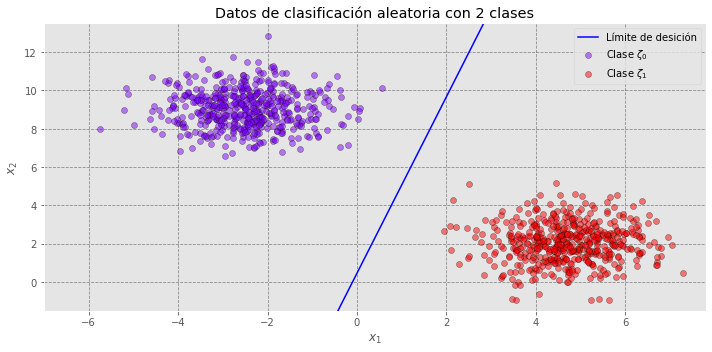

In [7]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)
p = Perceptron(X, y)
theta, n_list= p.entrenaP(0.5, 100)
p.graficar(X, theta)